## Problem Information

**Dataset:** Students' Dropout and Academic Success

**Source:** [UCI Machine Learning Repository] (https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

**Task:** Supervised Learning Problem - Classification


This dataset contains student records with features related to their demographics, academic performance, and enrollment. 

**Target Variable:** Indicates whether a student successfully graduated, dropped out, or is still enrolled. 

**Aim:** To predict student outcomes based on these features.

## Importing Libraries

In [27]:
import pandas as pd # Data Manipulation and Analysis 
import seaborn as sns # Statistical visualisations/ graphics
from sklearn.model_selection import train_test_split # Dataset splitting

## Data Preparation

In [ ]:
# Read CSV dataset into a DataFrame
df = pd.read_csv("data/data.csv", delimiter=";")
# Check first 10 rows
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [ ]:
# Check column datatypes
df.dtypes.reset_index().rename(columns={"index":"Column", 0:"Datatype"}) 

,Column,Datatype
0,Marital status,int64
1,Application mode,int64
2,Application order,int64
3,Course,int64
4,Daytime/evening attendance\t,int64
5,Previous qualification,int64
6,Previous qualification (grade),float64
7,Nacionality,int64
8,Mother's qualification,int64
9,Father's qualification,int64


In [ ]:
# Descriptive Statistics - Include categorical columns
df.describe(include='all')

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


In [ ]:
# Check if any null values overall
df.isnull().any().any()

np.False_

## Exploratory Data Analysis (EDA)

Count of Graduates: 2209
Count of Enrolled: 794
Count of Dropout: 1421


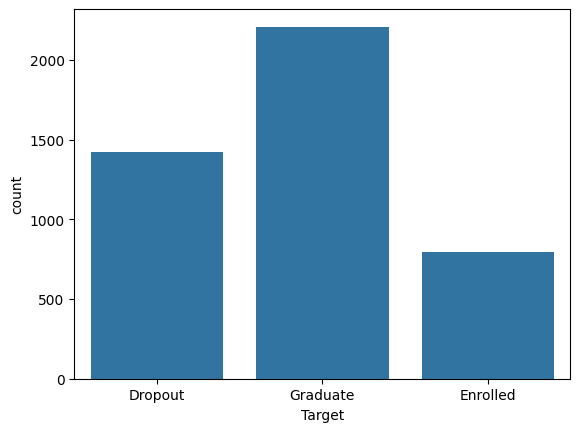

In [ ]:
# Barplot of target veriable class count
sns.countplot(data=df, x='Target')

# Target Class Counts Displayed
grad_count = df['Target'].value_counts().get('Graduate', 0)
enrol_count = df['Target'].value_counts().get('Enrolled', 0)
dropout_count = df['Target'].value_counts().get('Dropout', 0)
print(f'''Count of Graduates: {grad_count}
Count of Enrolled: {enrol_count}
Count of Dropout: {dropout_count}''')

In [28]:
# Dataset Splitting 
X = df.drop(columns=['Target']) # All features excluding target (y)
y = df['Target'] # Target/predictive feature
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 80% train, 20% test
    stratify=y,      
    random_state=42 # Reproducible seed
)